In [4]:
import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
# importamos wget y las librerías que nos faltan
from wget import download
from os import path, listdir


# y una en CSV
if not path.exists("netflix_titles.csv"):
  download("https://ignaciorlando.github.io/datasets/data-science/netflix_titles.csv")
else:
  print("No vamos a bajar el archivo de casas porque ya existe!")

# chequeamos si los archivos están en el directorio donde estamos parados
lista_archivos = listdir("./")
print(f"El contenido de la carpeta es: {lista_archivos}")

El contenido de la carpeta es: ['.git', '.idea', 'example1.ipynb', 'example2.ipynb', 'netflix_titles.csv', 'ObesityDataSet_raw_and_data_sinthetic.csv', 'reporte_obesity.html', 'venv']


In [6]:
# abrimos el archivo usando una función específica de pandas
raw_dataset = pd.read_csv("netflix_titles.csv",encoding='ISO-8859-1')
profileReport = ProfileReport(raw_dataset,title="Profiling Report")

In [7]:
profileReport.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profileReport.to_file(output_file="reporte_netflix.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ANALISIS DE HISTOGRAMAS
date_added = Gran mayoria de peliculas y series agregadas entre 2017-2021
release_year = gran mayoria lanzada entre 2018 y 2020
rating = Muchas peliculas para publico adulto y adolescente(mas que nada adulto)


ANALISIS DE CORRELACIONES
considerable(no mucha) correlacion en:
-rating & type:  Probablemente el tipo tenga que ver con el rating mature

In [17]:
raw_dataset['type'] = raw_dataset['type'].astype(str)
raw_dataset['rating'] = raw_dataset['rating'].astype(str)
raw_dataset = raw_dataset.sort_values('rating')

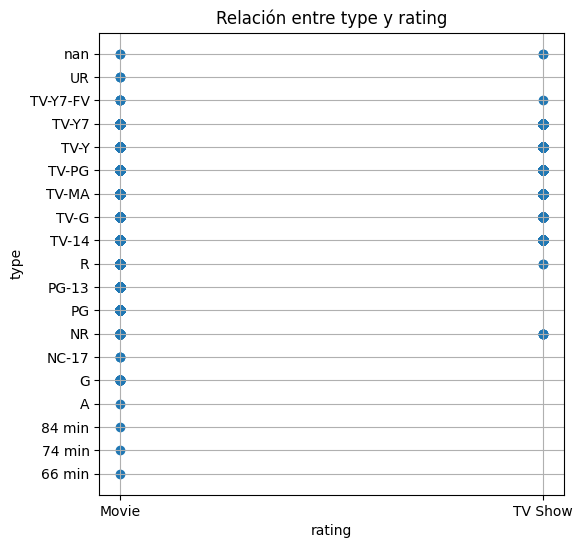

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
variable_1 = 'rating'
variable_2 = 'type'

plt.figure(figsize=(6, 6))  # con esta línea podemos ajustar el tamaño de la gráfica
plt.scatter(raw_dataset[variable_2], raw_dataset[variable_1])
plt.xlabel(variable_1)
plt.ylabel(variable_2)
plt.title("Relación entre {} y {}".format(variable_2, variable_1))

datos_columna1 = raw_dataset[variable_1]
datos_columna2 = raw_dataset[variable_2]




plt.grid(True)
plt.show()

No es muy explicatorio el grafico ya que no se el orden de los ratings, estuve investigando pero como haria para ordenarlos